# Finding the Best Markets to Advertise In
Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", dtype={"JobInterestOther": object, "CodeEventOther": object})

## Exploring the dataset
### Look for number of rows and columns

In [3]:
df.shape

(18175, 136)

## Print the first five rows

In [4]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Try to find relevant columns for the purpose of our analysis.

In [5]:
df.columns[df.isnull().mean()>0.8]
# drop all columns with more than 80 % null values?

Index(['BootcampFinish', 'BootcampLoanYesNo', 'BootcampName',
       'BootcampRecommend', 'ChildrenNumber', 'CodeEventConferences',
       'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam',
       'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup',
       'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther',
       'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops',
       'EmploymentFieldOther', 'EmploymentStatusOther', 'GenderOther',
       'HomeMortgageOwe', 'JobInterestBackEnd', 'JobInterestDataEngr',
       'JobInterestDataSci', 'JobInterestDevOps', 'JobInterestGameDev',
       'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX',
       'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodePen',
       'PodcastDevTea', 'PodcastDotNET', 'PodcastGiantRobots', 'PodcastJSAir',
       'PodcastJ

In [6]:
# We can use `isnull` with mean for treshold and then remove columns by boolean indexing with loc 
#(because remove columns), also need invert condition - so <.8 means remove all columns >=0.8:
df = df.loc[:, df.isnull().mean() < .8]

In [7]:
df.shape

(18175, 56)

# Why we're using a ready-made data set instead of organizing a survey.
To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this https://github.com/freeCodeCamp/2017-new-coder-survey repository.

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

## Figure out whether the sample we have is representative for our population of interest.
### The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.
### Generate a frequency distribution table for this column. Take percentages instead of absolute frequencies.

In [8]:
df.JobRoleInterest.value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                             11.770595
  Front-End Web Developer                                                                                                                                                             6.435927
  Data Scientist                                                                                                                                                                      2.173913
Back-End Web Developer                                                                                                                                                                2.030892
  Mobile Developer                                                                                                                                                                    1.673341
                                             

## Analyze the table.

### Are people interested in only one subject or they can be interested in more than one subject?
There are over 3000 rows indicating that responders were able to choose more than one answer for this question. YES, ppl can be interested in more than one subject
### If most people are interested in more than one subject, is this sample still representative?
Not unless we extract and summarize all subjects from multiple interests
### The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?
There are 6035 respondents interested in either web or mobile

In [9]:
no_nulls = df.dropna(subset=['JobRoleInterest', 'CountryLive'])

In [10]:
web_mobile = no_nulls[no_nulls.JobRoleInterest.str.contains("Web", case=False)| no_nulls.JobRoleInterest.str.contains("Mobile", case=False)].copy()
web_mobile.head()

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FinanciallySupporting,...,ResourceFCC,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,35000.0,NaN,...,1.0,NaN,NaN,1.0,NaN,1.0,1.0,"some college credit, no degree",NaN,1.0
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,70000.0,NaN,...,1.0,NaN,1.0,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,40000.0,0.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,"some college credit, no degree",NaN,1.0
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,140000.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN
6,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,30000.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,NaN


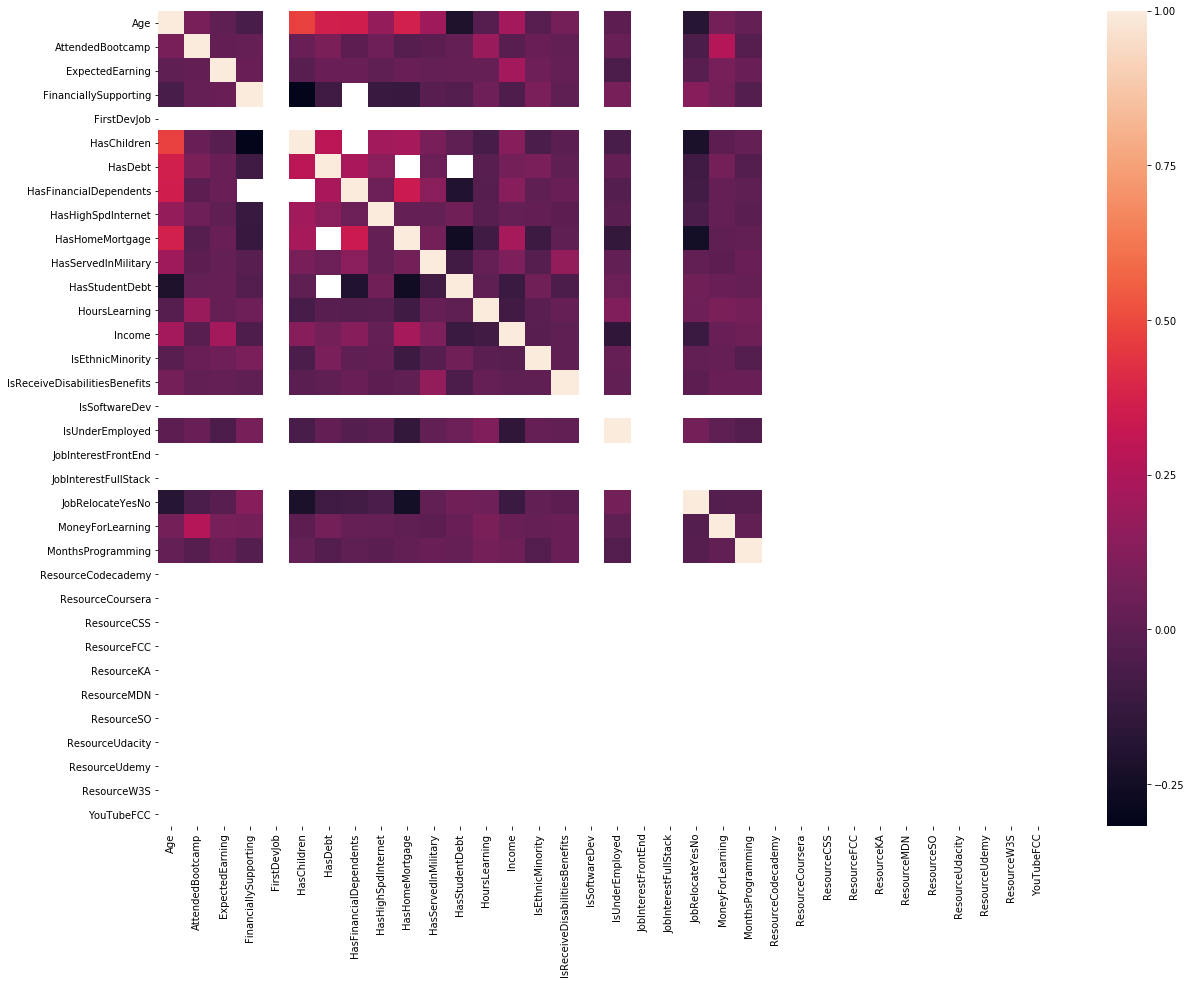

In [11]:
corr = no_nulls.corr()
fig, ax = plt.subplots(figsize = (20,15))
ax = sns.heatmap(corr)
plt.show()

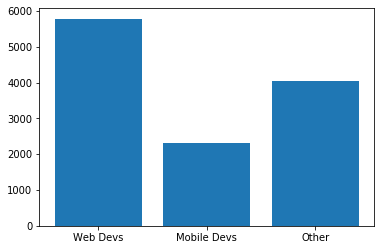

In [12]:
filt_web = df.JobRoleInterest.str.contains("Web", case=False)
filt_mob = df.JobRoleInterest.str.contains("Mobile", case=False)
filt_other = ((df.JobRoleInterest.str.contains("Web", case=False))|(df.JobRoleInterest.str.contains("Mobile",case=False)))

webs = filt_web.sum()
mobs = filt_mob.sum()
other = len(df.JobRoleInterest[~filt_other])-(webs+mobs)
dicts = {"Web Devs":webs,"Mobile Devs":mobs, "Other":other}
plt.bar(dicts.keys(), dicts.values())
plt.show()

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLiv` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLiv` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

## Generate a frequency table for the CountryLive variable.
- Generate both absolute and relative frequencies.
- Analyze the results.

In [13]:
countries = web_mobile.CountryLive.value_counts()
countries_norm = web_mobile.CountryLive.value_counts(normalize=True)*100

- Based on the results, what are the two markets you'd choose for advertisement?
- Can we stop the analysis here, or we need to go more in depth?

In [14]:
countries.head()

United States of America    2678
India                        443
United Kingdom               281
Canada                       221
Poland                       121
Name: CountryLive, dtype: int64

In [15]:
countries_norm.head()

United States of America    45.336042
India                        7.499577
United Kingdom               4.757068
Canada                       3.741324
Poland                       2.048417
Name: CountryLive, dtype: float64

## the two best markets relatively and absolutely are USA and India

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearnin` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

## Create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).
- You'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column.
- Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [16]:
web_mobile.MonthsProgramming.replace(0,1, inplace=True)
web_mobile["spent_monthly"] = round((web_mobile.MoneyForLearning/web_mobile.MonthsProgramming),2)
web_mobile.head()

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FinanciallySupporting,...,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,spent_monthly
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,35000.0,NaN,...,NaN,NaN,1.0,NaN,1.0,1.0,"some college credit, no degree",NaN,1.0,13.33
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,70000.0,NaN,...,NaN,1.0,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,200.00
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,40000.0,0.0,...,NaN,1.0,1.0,NaN,NaN,NaN,"some college credit, no degree",NaN,1.0,0.00
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,140000.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN,0.00
6,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,30000.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,NaN,0.00


## Find out how many null values there are in the new column (the column describing the amount of money students spend per month).

In [17]:
web_mobile.spent_monthly.isnull().sum()
zeros = (web_mobile.spent_monthly.eq(0))
web_mobile.spent_monthly.eq(0).sum()

2540

In [18]:
# there seem to be 2407 students who don´t spend any money per month

## Keep only the rows that don't have a null value for the new column.

In [19]:
no_zeros = web_mobile[~zeros].copy()
# also remove MonthsProgramming rows that have 0 to prevent Division by zero
no_months = (no_zeros.MonthsProgramming.eq(0))
no_zeros = no_zeros[~no_months].copy()
no_zeros.describe()

,Age,AttendedBootcamp,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,...,ResourceCSS,ResourceFCC,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,YouTubeFCC,spent_monthly
count,3321.000000,3307.00000,2978.000000,798.000000,0.0,801.000000,3311.000000,3312.000000,3333.000000,1582.000000,...,1043.0,2783.0,758.0,1384.0,2197.0,829.0,1327.0,1885.0,1325.0,2840.000000
mean,28.898223,0.09495,53489.701478,0.214286,NaN,0.656679,0.481728,0.242452,0.890789,0.260430,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,366.204602
std,8.557488,0.29319,55042.858501,0.410583,NaN,0.475114,0.499741,0.428631,0.311950,0.439008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2297.878976
min,0.000000,0.00000,6000.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.030000
25%,23.000000,0.00000,30000.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.330000
50%,27.000000,0.00000,50000.000000,0.000000,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31.250000
75%,33.000000,0.00000,65000.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,125.000000
max,71.000000,1.00000,1000000.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,80000.000000


## Remove also any rows that have null values in the `CountryLive` column.

In [20]:
no_zeros.CountryLive.isna().sum()

0

## Group the remaining data by the `CountryLive` column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.
- You can use the `DataFrame.groupby()` method.
- As a summary metric, we recommend choosing the mean to take into account all values in the distributions. You can also compute the median or the mode to see how they compare with the mean.
- Analyze the results. Is there anything in the results that looks off?

In [21]:
spent_per_country = no_zeros.groupby("CountryLive").mean()["spent_monthly"]
spent_per_country.sort_values(ascending=False)

CountryLive
Yemen          10000.000000
Puerto Rico     7508.157500
Austria         1872.416250
Spain           1552.985455
Norway           952.578000
                   ...     
Bolivia                 NaN
Liberia                 NaN
Panama                  NaN
Qatar                   NaN
Sudan                   NaN
Name: spent_monthly, Length: 117, dtype: float64

In [22]:
no_zeros.describe()["spent_monthly"]

count     2840.000000
mean       366.204602
std       2297.878976
min          0.030000
25%          8.330000
50%         31.250000
75%        125.000000
max      80000.000000
Name: spent_monthly, dtype: float64

In [23]:
# concentrate on the top 4 countries: USA, India, UK and Canada
india = no_zeros.CountryLive == "India"
usa = no_zeros.CountryLive == "United States of America"
uk = no_zeros.CountryLive == "United Kingdom"
canada = no_zeros.CountryLive == "Canada" #3327 rows

india_spent = no_zeros.loc[india]
usa_spent = no_zeros.loc[usa]
uk_spent = no_zeros.loc[uk]
canada_spent = no_zeros.loc[canada]

In [24]:
top_spenders = pd.concat([india_spent, usa_spent, uk_spent, canada_spent], axis = 0).copy()
monthly_spenders = top_spenders.groupby("CountryLive").mean()["spent_monthly"]

In [25]:
monthly_spenders.sort_values(ascending=False)

CountryLive
United States of America    437.498746
India                       339.052294
Canada                      254.579612
United Kingdom               97.055760
Name: spent_monthly, dtype: float64

## expected mean values

|CountryLive||
|------|------|
|United States of America    |227.997996|
|India                       |135.100982|
|United Kingdom              | 45.534443|
|Canada                      |113.510961|

Name: money_per_month, dtype: float64
### note:
I was using the filtered down dataset `web_mobile` from the moment it has been decided to focus on these interests. The solution seems to be using the entirety of the dataset for the means

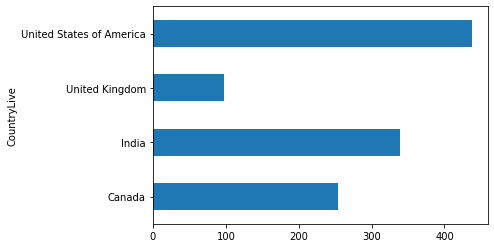

In [26]:
monthly_spenders.plot(kind="barh")
plt.show()

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

### Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.
- Can you spot extreme outliers for India, Canada or the United Kingdom?
- If not, what extreme outliers can you spot?

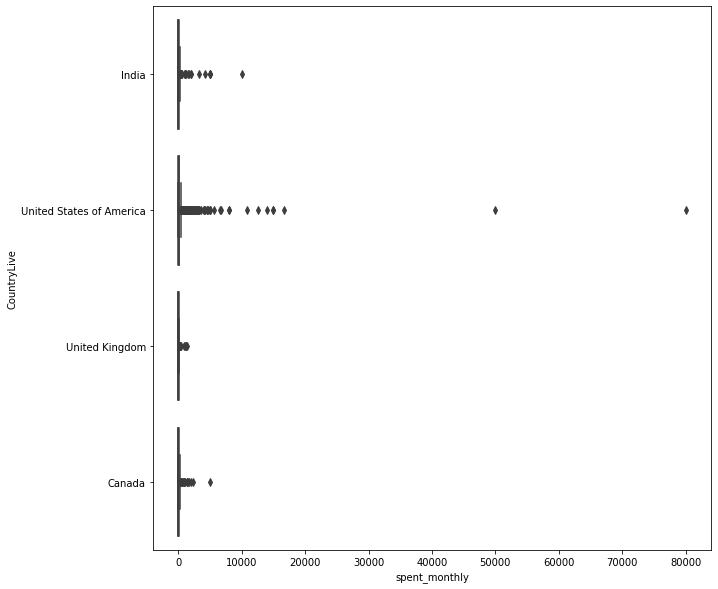

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="spent_monthly", y="CountryLive", data=top_spenders, orient = "h")
plt.show()

In [28]:
# most extreme outliers are within USA

### Eliminate the extreme outliers.

In [29]:
medians = top_spenders.groupby("CountryLive").median()["spent_monthly"]
medians

CountryLive
Canada                      25.00
India                       20.00
United Kingdom              20.83
United States of America    33.33
Name: spent_monthly, dtype: float64

In [30]:
means = top_spenders.groupby("CountryLive").mean()["spent_monthly"]
means

CountryLive
Canada                      254.579612
India                       339.052294
United Kingdom               97.055760
United States of America    437.498746
Name: spent_monthly, dtype: float64

In [31]:
sdts = top_spenders.groupby("CountryLive").std()["spent_monthly"]
sdts


CountryLive
Canada                       646.326554
India                       1109.380724
United Kingdom               231.547616
United States of America    2740.425116
Name: spent_monthly, dtype: float64

## define outliers
1. Data point that falls outside of 1,5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. data point that falls outside of 3 standard deviations. we can use a z-score and if the z-score falls outside of 2 STDs it´s considered an outlier

In [32]:
outliers = []
def detect_outliers(data):
    thresh = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > thresh:
            outliers.append(i)
    return outliers

In [33]:
outs = detect_outliers(top_spenders.spent_monthly)

In [34]:
min(outs)

8000.0

In [35]:
top_spenders.spent_monthly.describe()

count     1833.000000
mean       394.873573
std       2455.136829
min          0.030000
25%         10.000000
50%         33.330000
75%        166.670000
max      80000.000000
Name: spent_monthly, dtype: float64

In [56]:
no_outs = top_spenders[top_spenders['spent_monthly']<20000]
no_outs.head()

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FinanciallySupporting,...,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,spent_monthly
137,21.0,0.0,"less than 100,000",NaN,India,India,NaN,Not working but looking for work,10000.0,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,bachelor's degree,Computer Science,1.0,18.75
168,16.0,0.0,more than 1 million,NaN,India,India,NaN,Not working and not looking for work,700000.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,0.42
230,19.0,0.0,"between 100,000 and 1 million",NaN,India,India,NaN,Not working but looking for work,100000.0,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,4.74
529,20.0,0.0,more than 1 million,NaN,India,India,NaN,Not working but looking for work,20000.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,bachelor's degree,NaN,1.0,33.33
987,25.0,0.0,more than 1 million,NaN,India,India,NaN,Not working but looking for work,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Computer Science,NaN,1000.00


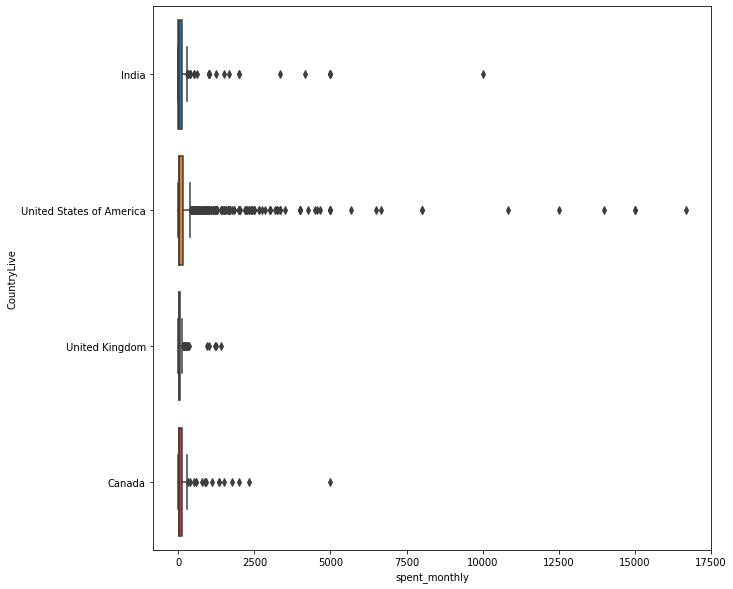

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="spent_monthly", y="CountryLive", data=no_outs, orient = "h")
plt.show()

In [58]:
# isolate outliers for India:
india_outs = no_outs[(no_outs["CountryLive"]=="India")&(no_outs["spent_monthly"]>=2500)]
india_outs

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FinanciallySupporting,...,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,spent_monthly
1728,24.0,0.0,"between 100,000 and 1 million",NaN,India,India,NaN,A stay-at-home parent or homemaker,70000.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,1.0,5000.00
1755,20.0,0.0,more than 1 million,NaN,India,India,NaN,Not working and not looking for work,100000.0,NaN,...,1.0,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,1.0,3333.33
7989,28.0,0.0,"between 100,000 and 1 million",15 to 29 minutes,India,India,software development and IT,Employed for wages,500000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Aerospace and Aeronautical Engineering,1.0,5000.00
8126,22.0,0.0,more than 1 million,NaN,India,India,NaN,Not working but looking for work,80000.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Electrical and Electronics Engineering,NaN,5000.00
13398,19.0,0.0,more than 1 million,NaN,India,India,NaN,Unable to work,100000.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,bachelor's degree,Computer Science,NaN,10000.00
15587,27.0,0.0,more than 1 million,15 to 29 minutes,India,India,software development and IT,Employed for wages,65000.0,0.0,...,NaN,NaN,1.0,NaN,NaN,1.0,bachelor's degree,Communications,NaN,4166.67


In [59]:
# remove outliers for India:
no_outs = no_outs.drop(india_outs.index) #using row labels

In [62]:
# isolate outliers for USA:
usa_outs = no_outs[(no_outs.CountryLive=="United States of America")&(no_outs.spent_monthly >=6000)]
usa_outs

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FinanciallySupporting,...,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,spent_monthly
718,26.0,1.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,Employed for wages,50000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,1.0,8000.00
1222,32.0,1.0,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,Not working and not looking for work,50000.0,NaN,...,NaN,1.0,1.0,1.0,1.0,NaN,bachelor's degree,Anthropology,1.0,6500.00
3930,31.0,0.0,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,Not working and not looking for work,100000.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,bachelor's degree,Biology,1.0,10833.33
6805,46.0,1.0,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,Not working but looking for work,70000.0,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,bachelor's degree,Business Administration and Management,1.0,15000.00
7198,32.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,education,Employed for wages,55000.0,NaN,...,1.0,1.0,1.0,1.0,NaN,1.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,1.0,14000.00
7505,26.0,1.0,more than 1 million,NaN,United States of America,United States of America,NaN,Not working but looking for work,65000.0,NaN,...,NaN,NaN,1.0,NaN,1.0,1.0,bachelor's degree,Economics,NaN,6666.67
9778,33.0,1.0,"between 100,000 and 1 million",15 to 29 minutes,United States of America,United States of America,education,Employed for wages,55000.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,master's degree (non-professional),Chemical Engineering,NaN,8000.00
16650,29.0,0.0,more than 1 million,NaN,United States of America,United States of America,NaN,Not working but looking for work,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,associate's degree,Computer Programming,NaN,16666.67
16997,27.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,health care,Employed for wages,60000.0,0.0,...,NaN,NaN,1.0,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,12500.00
17231,50.0,0.0,"less than 100,000",NaN,Kenya,United States of America,NaN,Not working but looking for work,40000.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,bachelor's degree,Computer Programming,NaN,15000.00


In [63]:
# remove usa outliers where they didn´t attend a bootcamp:
no_bootcamp = no_outs[(no_outs.AttendedBootcamp == 0)&(no_outs.CountryLive == "United States of America")&(no_outs.spent_monthly>=6000)]
no_outs = no_outs.drop(no_bootcamp.index)

In [66]:
# remove outliers that spent less than 3 months programming:
less3 = no_outs[(no_outs.MonthsProgramming <= 3)&(no_outs.CountryLive == "United States of America")&(no_outs.spent_monthly>=6000)]
no_outs = no_outs.drop(less3.index)

In [69]:
# isolate outliers for Canada:
canada_outs = no_outs[(no_outs.CountryLive == "Canada")&(no_outs.spent_monthly>=4500)]
canada_outs

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FinanciallySupporting,...,ResourceKA,ResourceMDN,ResourceSO,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,spent_monthly
13659,24.0,1.0,more than 1 million,30 to 44 minutes,Canada,Canada,finance,Employed for wages,60000.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,bachelor's degree,Finance,1.0,5000.0


In [70]:
# remove Canada outlier:
no_outs = no_outs.drop(canada_outs.index)

### Recompute the mean values, just like we did in the previous screen: group the data by the CountryLive column, and then find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.
- If the mean values still look off, look more for extreme outliers. For instance, you can find a couple of persons in India who spend $5000 per month. Isolate these respondents and examine their answers to other questions in the survey to figure out whether these big expenses with learning are justified — you can try to find out whether they attended any bootcamp, which might justify the large amount of money spent.
- If you find more extreme outliers, remove them, and recompute the mean values.
- If you get stuck, you can always sneak a look at the solution notebook.
### Is it clear enough at this point what are the two best countries to choose for advertisement?

In [71]:
no_outs.spent_monthly.describe()

count    1814.000000
mean      244.286985
std       612.313104
min         0.030000
25%        10.000000
50%        33.330000
75%       150.000000
max      5666.670000
Name: spent_monthly, dtype: float64

In [72]:
top_no_outs = no_outs.groupby("CountryLive").mean()["spent_monthly"]
top_no_outs.sort_values(ascending = False)

CountryLive
United States of America    270.305011
Canada                      208.055882
India                       153.285915
United Kingdom               97.055760
Name: spent_monthly, dtype: float64

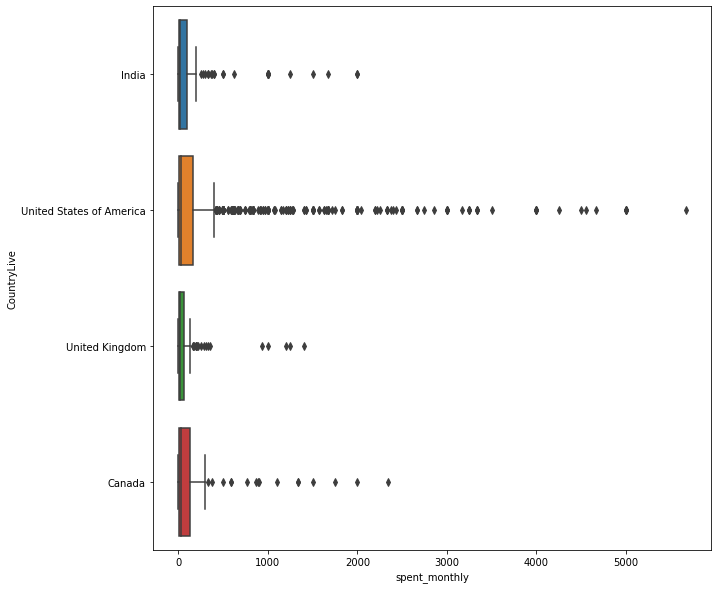

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="spent_monthly", y="CountryLive", data=no_outs, orient = "h")
plt.show()

### Top 2 spending countries are USA and Canada

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

We need to choose one more market though.

### Try to choose the second market to advertise in.
- Remember that we sell subscriptions at a price of $59 per month.
- Make sure you also consider the number of potential customers in each country.

### Based on all of the results you've found so far, brainstorm a couple of possible decisions.
- Does it make sense to advertise in more then two countries?
- Does it make sense to split the advertising budget unequally (e.g.: spend 70% to advertise in the US and 30% to advertise in India)?
- Does it make sense to advertise only in the US?
- If we had a marketing team in our company, would it be better to just send them our results and let them use their domain knowledge to take the best decision?

In [75]:
# percentage of potential customers:
no_outs.CountryLive.value_counts(normalize=True)*100

United States of America    78.445424
India                        9.040794
United Kingdom               6.890849
Canada                       5.622933
Name: CountryLive, dtype: float64

# Conclusions:
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

- We definitely want to target the US market.
- based on the amount of monthly spending on learning we have to choose between Canada and India for the second market
 - Canada is spending more but India has a higher proportion of potential customers